# LightGBM 최적화

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('./data/train.csv').drop(columns=['UID'])

In [54]:
df.info()   # non-null: 이상치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  object 
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  object 
 11  대출 상환 기간           10000 non-null  object 
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
 16  채무 불이행 여부          1000

In [55]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

                주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0                  자가  1941337.5      10년 이상          0.0           9   
1                  월세  1979505.0      10년 이상          0.0           5   
2                  월세  1356381.0          4년          0.0          12   
3                  월세  1049017.5          6년          0.0          15   
4                  월세  4320217.5          2년          0.0          11   
...               ...        ...         ...          ...         ...   
9995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0           9   
9996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0          11   
9997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0           9   
9998               자가  3343584.0      10년 이상          0.0          10   
9999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수   대출 목적  \
0         13.4  400597.5            0        

In [56]:
# 원 핫 인코딩
categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']


X = pd.get_dummies(X, columns = categories, dtype=int) 

X

연간 소득  체납 세금 압류 횟수  개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  \
0     1941337.5          0.0           9      13.4  400597.5            0   
1     1979505.0          0.0           5      15.1  360679.5            0   
2     1356381.0          0.0          12      18.8  491770.5            1   
3     1049017.5          0.0          15      14.8  411546.0            1   
4     4320217.5          0.0          11      26.1  895288.5            0   
...         ...          ...         ...       ...       ...          ...   
9995  1339473.0          0.0           9      18.7  319027.5            0   
9996  2297230.5          0.0          11      28.3  399799.5            0   
9997  1221523.5          0.0           9      30.1  823305.0            0   
9998  3343584.0          0.0          10      20.3  724314.0            0   
9999  2175133.5          0.0           5      24.9   52999.5            0   

      마지막 연체 이후 경과 개월 수  개인 파산 횟수   현재 대출 잔액  현재 미상환 신용액  ...  \
0                    24         1   390903.0    225457.5  ...   
1                    11         0  1002184.5     64749.0  ...   
2                    74         3   227775.0    487644.0  ...   
3                    22         1   251383.5    413211.0  ...   
4                    32         0  1163176.5     78991.5  ...   
...                 ...       ...        ...         ...  ...   
9995                 68         0   126216.0    177028.5  ...   
9996                  7         0   371907.0    347449.5  ...   
9997                 14         0   869736.0    176905.5  ...   
9998                 25         0   443008.5    139294.5  ...   
9999                  9         0  1152918.0    106930.5  ...   

      대출 목적_소규모 사업 자금  대출 목적_여행 자금  대출 목적_의료비  대출 목적_이사 비용  대출 목적_자동차 구매  \
0                   0            0          0            0             0   
1                   0            0          0            0             0   
2                   0            0          0            0             0   
3                   0            0          0            0             0   
4                   0            0          0            0             0   
...               ...          ...        ...          ...           ...   
9995                0            0          0            0             0   
9996                0            0          0            0             0   
9997                0            0          0            0             0   
9998                0            0          0            0             0   
9999                0            0          0            0             0   

      대출 목적_주택 개보수  대출 목적_주택 구매  대출 목적_휴가 비용  대출 상환 기간_단기 상환  대출 상환 기간_장기 상환  
0                0            0            0               1               0  
1                0            0            0               1               0  
2                0            0            0               1               0  
3                0            0            0               1               0  
4                0            0            0               0               1  
...            ...          ...          ...             ...             ...  
9995             0            0            0               1               0  
9996             1            0            0               0               1  
9997             0            0            0               0               1  
9998             0            0            0               1               0  
9999             1            0            0               0               1  

[10000 rows x 43 columns]

In [57]:
# 로그
cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

for i in cl:
    X[i] = X[i].apply(lambda x: np.log1p(x))

X

연간 소득  체납 세금 압류 횟수  개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  \
0     1941337.5          0.0           9      13.4  400597.5            0   
1     1979505.0          0.0           5      15.1  360679.5            0   
2     1356381.0          0.0          12      18.8  491770.5            1   
3     1049017.5          0.0          15      14.8  411546.0            1   
4     4320217.5          0.0          11      26.1  895288.5            0   
...         ...          ...         ...       ...       ...          ...   
9995  1339473.0          0.0           9      18.7  319027.5            0   
9996  2297230.5          0.0          11      28.3  399799.5            0   
9997  1221523.5          0.0           9      30.1  823305.0            0   
9998  3343584.0          0.0          10      20.3  724314.0            0   
9999  2175133.5          0.0           5      24.9   52999.5            0   

      마지막 연체 이후 경과 개월 수  개인 파산 횟수   현재 대출 잔액  현재 미상환 신용액  ...  \
0                    24         1  12.876217   12.325891  ...   
1                    11         0  13.817694   11.078289  ...   
2                    74         3  12.336118   13.097343  ...   
3                    22         1  12.434739   12.931716  ...   
4                    32         0  13.966666   11.277108  ...   
...                 ...       ...        ...         ...  ...   
9995                 68         0  11.745758   12.084072  ...   
9996                  7         0  12.826402   12.758377  ...   
9997                 14         0  13.675946   12.083377  ...   
9998                 25         0  13.001346   11.844353  ...   
9999                  9         0  13.957808   11.579944  ...   

      대출 목적_소규모 사업 자금  대출 목적_여행 자금  대출 목적_의료비  대출 목적_이사 비용  대출 목적_자동차 구매  \
0                   0            0          0            0             0   
1                   0            0          0            0             0   
2                   0            0          0            0             0   
3                   0            0          0            0             0   
4                   0            0          0            0             0   
...               ...          ...        ...          ...           ...   
9995                0            0          0            0             0   
9996                0            0          0            0             0   
9997                0            0          0            0             0   
9998                0            0          0            0             0   
9999                0            0          0            0             0   

      대출 목적_주택 개보수  대출 목적_주택 구매  대출 목적_휴가 비용  대출 상환 기간_단기 상환  대출 상환 기간_장기 상환  
0                0            0            0               1               0  
1                0            0            0               1               0  
2                0            0            0               1               0  
3                0            0            0               1               0  
4                0            0            0               0               1  
...            ...          ...          ...             ...             ...  
9995             0            0            0               1               0  
9996             1            0            0               0               1  
9997             0            0            0               0               1  
9998             0            0            0               1               0  
9999             1            0            0               0               1  

[10000 rows x 43 columns]

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부

In [59]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_esimators=400,
    learning_rate=0.7,
    early_stopping_rounds=100,
    verbose=1
)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, eval_set=eval_set)


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Info] Number of positive: 1894, number of negative: 3731


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1862
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 37
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336711 -> initscore=-0.677985
[LightGBM] [Info] Start training from score -0.677985
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[3]	training's binary_logloss: 0.505264	valid_1's binary_logloss: 0.565333


LGBMClassifier(early_stopping_rounds=100, learning_rate=0.7, n_esimators=400,
               verbose=1)

In [60]:
lgbm.score(X_train, y_train), lgbm.score(X_test, y_test)

[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] Unknown parameter: n_esimators


(0.75, 0.6896)

In [75]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Optuna 최적화 함수 정의
def optimize_lightgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 4, 20),  # ✅ 트리 깊이 증가
        "num_leaves": trial.suggest_int("num_leaves", 32, 256),  # ✅ 리프 노드 개수 증가
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 50),  # ✅ 최소 샘플 수 조정
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),  # ✅ 샘플링 비율 증가
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),  # ✅ 특성 샘플링 증가
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),  # ✅ L1 정규화 추가
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),  # ✅ L2 정규화 추가
        "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 0.3),  # ✅ 최소 분할 이득 감소
        "feature_fraction": trial.suggest_float("feature_fraction", 0.7, 1.0),  # ✅ 사용할 Feature 개수 증가
    }

    # LightGBM 모델 생성
    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optuna 스터디 생성 및 최적화 실행
study_lightgbm = optuna.create_study(direction="maximize")
study_lightgbm.optimize(optimize_lightgbm, n_trials=50)  # 50번 탐색

# 최적의 하이퍼파라미터 출력
best_params_lightgbm = study_lightgbm.best_params
print("Best LightGBM Hyperparameters:", best_params_lightgbm)


[I 2025-03-20 17:31:13,626] A new study created in memory with name: no-name-7bcbbd08-dd3f-4993-957c-5b8ce70dfb7e


[LightGBM] [Warning] feature_fraction is set=0.9307880215297276, colsample_bytree=0.7272381410779046 will be ignored. Current value: feature_fraction=0.9307880215297276
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9307880215297276, colsample_bytree=0.7272381410779046 will be ignored. Current value: feature_fraction=0.9307880215297276
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1879
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:13,897] Trial 0 finished with value: 0.7036 and parameters: {'n_estimators': 486, 'learning_rate': 0.2762724750828811, 'max_depth': 14, 'num_leaves': 164, 'min_child_samples': 10, 'subsample': 0.8871460379071511, 'colsample_bytree': 0.7272381410779046, 'reg_alpha': 1.6339407173860965, 'reg_lambda': 2.4271796603994735, 'min_split_gain': 0.13483494611375896, 'feature_fraction': 0.9307880215297276}. Best is trial 0 with value: 0.7036.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:14,192] Trial 1 finished with value: 0.7176 and parameters: {'n_estimators': 961, 'learning_rate': 0.24051508611965336, 'max_depth': 8, 'num_leaves': 254, 'min_child_samples': 21, 'subsample': 0.9685389301663723, 'colsample_bytree': 0.7947340351926531, 'reg_alpha': 8.099034475682446, 'reg_lambda': 5.266380724416429, 'min_split_gain': 0.09621658859794455, 'feature_fraction': 0.9677214453928786}. Best is trial 1 with value: 0.7176.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:14,316] Trial 2 finished with value: 0.7224 and parameters: {'n_estimators': 569, 'learning_rate': 0.21217600928341065, 'max_depth': 4, 'num_leaves': 137, 'min_child_samples': 44, 'subsample': 0.9767858059121071, 'colsample_bytree': 0.7925977875795157, 'reg_alpha': 8.615500441564356, 'reg_lambda': 1.0095089176919791, 'min_split_gain': 0.10172052817234924, 'feature_fraction': 0.877898337515101}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:14,835] Trial 3 finished with value: 0.7064 and parameters: {'n_estimators': 210, 'learning_rate': 0.08009732384838995, 'max_depth': 20, 'num_leaves': 158, 'min_child_samples': 2, 'subsample': 0.7603256165412637, 'colsample_bytree': 0.9358354802531577, 'reg_alpha': 2.536110006512379, 'reg_lambda': 0.5194342294716969, 'min_split_gain': 0.041843609576869556, 'feature_fraction': 0.9012918112613085}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:15,098] Trial 4 finished with value: 0.702 and parameters: {'n_estimators': 439, 'learning_rate': 0.11221752011413653, 'max_depth': 10, 'num_leaves': 40, 'min_child_samples': 7, 'subsample': 0.8157326457285723, 'colsample_bytree': 0.8833652305068475, 'reg_alpha': 3.5108023450995907, 'reg_lambda': 3.5387820958690996, 'min_split_gain': 0.07668967554757722, 'feature_fraction': 0.921871098542917}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[I 2025-03-20 17:31:15,322] Trial 5 finished with value: 0.7168 and parameters: {'n_estimators': 282, 'learning_rate': 0.0975676167892516, 'max_depth': 12, 'num_leaves': 186, 'min_child_samples': 15, 'subsample': 0.8916499303545479, 'colsample_bytree': 0.8595655900400203, 'reg_alpha': 1.9916092233051796, 'reg_lambda': 1.4022773206786066, 'min_split_gain': 0.19774609910469768, 'feature_fraction': 0.9289166624886165}. Best is trial 2 with value: 0.7224.
[I 2025-03-20 17:31:15,414] Trial 6 finished with value: 0.7124 and parameters: {'n_estimators': 277, 'learning_rate': 0.17173988981976793, 'max_depth': 7, 'num_leaves': 75, 'min_child_samples': 1, 'subsample': 0.8642736469434051, 'colsample_bytree': 0.9875847060033455, 'reg_alpha': 5.7199636194089, 'reg_lambda': 3.9752283950365577, 'min_split_gain': 0.26134208358646793, 'feature_fraction': 0.7739848689782736}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:15,733] Trial 7 finished with value: 0.7144 and parameters: {'n_estimators': 788, 'learning_rate': 0.059664237458407675, 'max_depth': 4, 'num_leaves': 89, 'min_child_samples': 33, 'subsample': 0.9720698360002402, 'colsample_bytree': 0.9032690818847232, 'reg_alpha': 2.0321776222872345, 'reg_lambda': 6.313716606596031, 'min_split_gain': 0.12550579176119864, 'feature_fraction': 0.9764579089425506}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.9764579089425506, colsample_bytree=0.9032690818847232 will be ignored. Current value: feature_fraction=0.9764579089425506
[LightGBM] [Warning] feature_fraction is set=0.931312584217284, colsample_bytree=0.9918052950353995 will be ignored. Current value: feature_fraction=0.931312584217284
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.931312584217284, colsample_bytree=0.9918052950353995 will be ignored. Current value: feature_fraction=0.931312584217284
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> 

[I 2025-03-20 17:31:16,194] Trial 8 finished with value: 0.6876 and parameters: {'n_estimators': 973, 'learning_rate': 0.19693275980815095, 'max_depth': 6, 'num_leaves': 151, 'min_child_samples': 2, 'subsample': 0.8065830340029355, 'colsample_bytree': 0.9918052950353995, 'reg_alpha': 1.5214811040097809, 'reg_lambda': 7.136742361548514, 'min_split_gain': 0.01263101510301915, 'feature_fraction': 0.931312584217284}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:16,707] Trial 9 finished with value: 0.7152 and parameters: {'n_estimators': 673, 'learning_rate': 0.030088891103453703, 'max_depth': 20, 'num_leaves': 247, 'min_child_samples': 4, 'subsample': 0.7111329031920186, 'colsample_bytree': 0.8450619481062102, 'reg_alpha': 3.5816198433198077, 'reg_lambda': 1.7505438212124258, 'min_split_gain': 0.2873783051497283, 'feature_fraction': 0.7355861271012419}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:16,943] Trial 10 finished with value: 0.7176 and parameters: {'n_estimators': 665, 'learning_rate': 0.29487624845192295, 'max_depth': 16, 'num_leaves': 111, 'min_child_samples': 50, 'subsample': 0.9349485038434553, 'colsample_bytree': 0.73357793828813, 'reg_alpha': 9.222045859391464, 'reg_lambda': 9.428494645216192, 'min_split_gain': 0.20073724895697698, 'feature_fraction': 0.8451983201364527}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.8451983201364527, colsample_bytree=0.73357793828813 will be ignored. Current value: feature_fraction=0.8451983201364527
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8451983201364527, colsample_bytree=0.73357793828813 will be ignored. Current value: feature_fraction=0.8451983201364527
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-03-20 17:31:17,255] Trial 11 finished with value: 0.716 and parameters: {'n_estimators': 970, 'learning_rate': 0.22565132825805287, 'max_depth': 8, 'num_leaves': 222, 'min_child_samples': 29, 'subsample': 0.993116681905347, 'colsample_bytree': 0.7941495243440378, 'reg_alpha': 9.096014791083366, 'reg_lambda': 5.352222059296679, 'min_split_gain': 0.08760550135766795, 'feature_fraction': 0.85587102954021}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.85587102954021, colsample_bytree=0.7941495243440378 will be ignored. Current value: feature_fraction=0.85587102954021
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.85587102954021, colsample_bytree=0.7941495243440378 will be ignored. Current value: feature_fraction=0.85587102954021
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-03-20 17:31:17,431] Trial 12 finished with value: 0.7204 and parameters: {'n_estimators': 793, 'learning_rate': 0.23564401095709275, 'max_depth': 4, 'num_leaves': 202, 'min_child_samples': 42, 'subsample': 0.9382583790910126, 'colsample_bytree': 0.7901033154866983, 'reg_alpha': 7.138312858941009, 'reg_lambda': 7.978245140296328, 'min_split_gain': 0.17211571013087196, 'feature_fraction': 0.999760520462136}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.999760520462136, colsample_bytree=0.7901033154866983 will be ignored. Current value: feature_fraction=0.999760520462136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.999760520462136, colsample_bytree=0.7901033154866983 will be ignored. Current value: feature_fraction=0.999760520462136
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-03-20 17:31:17,766] Trial 13 finished with value: 0.7192 and parameters: {'n_estimators': 776, 'learning_rate': 0.14208999441090062, 'max_depth': 4, 'num_leaves': 196, 'min_child_samples': 43, 'subsample': 0.928081883107237, 'colsample_bytree': 0.7930586276444173, 'reg_alpha': 6.9736407409914545, 'reg_lambda': 8.919107970607904, 'min_split_gain': 0.181205514212944, 'feature_fraction': 0.8226984473435268}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[I 2025-03-20 17:31:17,947] Trial 14 finished with value: 0.7156 and parameters: {'n_estimators': 598, 'learning_rate': 0.2389326983094705, 'max_depth': 4, 'num_leaves': 121, 'min_child_samples': 39, 'subsample': 0.9307000680487325, 'colsample_bytree': 0.7634822651582741, 'reg_alpha': 6.617582936025412, 'reg_lambda': 7.5180270666360745, 'min_split_gain': 0.23758559557984377, 'feature_fraction': 0.9892672020707514}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:18,153] Trial 15 finished with value: 0.7184 and parameters: {'n_estimators': 791, 'learning_rate': 0.19174226006994, 'max_depth': 10, 'num_leaves': 202, 'min_child_samples': 48, 'subsample': 0.9985719925229024, 'colsample_bytree': 0.827670960396688, 'reg_alpha': 7.65786839362158, 'reg_lambda': 8.186301413626248, 'min_split_gain': 0.1582391883690561, 'feature_fraction': 0.8849081471812891}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:18,417] Trial 16 finished with value: 0.7212 and parameters: {'n_estimators': 418, 'learning_rate': 0.26217585412356637, 'max_depth': 6, 'num_leaves': 136, 'min_child_samples': 40, 'subsample': 0.9492176384533395, 'colsample_bytree': 0.7645998306608002, 'reg_alpha': 9.81070635036952, 'reg_lambda': 0.13062774050346848, 'min_split_gain': 0.056409390651358374, 'feature_fraction': 0.8005060982127494}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:18,609] Trial 17 finished with value: 0.714 and parameters: {'n_estimators': 362, 'learning_rate': 0.26343374950070486, 'max_depth': 6, 'num_leaves': 127, 'min_child_samples': 36, 'subsample': 0.8978102166245702, 'colsample_bytree': 0.7007962418992741, 'reg_alpha': 9.987915951870567, 'reg_lambda': 0.4405380993109447, 'min_split_gain': 0.04462773839199844, 'feature_fraction': 0.7953790009162647}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:19,148] Trial 18 finished with value: 0.7048 and parameters: {'n_estimators': 129, 'learning_rate': 0.1437258454974587, 'max_depth': 10, 'num_leaves': 83, 'min_child_samples': 25, 'subsample': 0.8316867188785885, 'colsample_bytree': 0.7550098817806953, 'reg_alpha': 5.133516415423013, 'reg_lambda': 2.974271404608557, 'min_split_gain': 0.0007889311944923177, 'feature_fraction': 0.7206932481624047}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.7206932481624047, colsample_bytree=0.7550098817806953 will be ignored. Current value: feature_fraction=0.7206932481624047
[LightGBM] [Warning] feature_fraction is set=0.7602565883921205, colsample_bytree=0.8189676637283607 will be ignored. Current value: feature_fraction=0.7602565883921205
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7602565883921205, colsample_bytree=0.8189676637283607 will be ignored. Current value: feature_fraction=0.7602565883921205
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333

[I 2025-03-20 17:31:19,512] Trial 19 finished with value: 0.7184 and parameters: {'n_estimators': 532, 'learning_rate': 0.20411219611911238, 'max_depth': 17, 'num_leaves': 48, 'min_child_samples': 44, 'subsample': 0.9680445853863551, 'colsample_bytree': 0.8189676637283607, 'reg_alpha': 8.630029224534272, 'reg_lambda': 0.07506882283821015, 'min_split_gain': 0.05519676217998168, 'feature_fraction': 0.7602565883921205}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:19,757] Trial 20 finished with value: 0.722 and parameters: {'n_estimators': 412, 'learning_rate': 0.2980693705584268, 'max_depth': 6, 'num_leaves': 138, 'min_child_samples': 33, 'subsample': 0.8663029557919953, 'colsample_bytree': 0.76420629199027, 'reg_alpha': 9.582127127845885, 'reg_lambda': 1.25214643625171, 'min_split_gain': 0.12228934328336065, 'feature_fraction': 0.8142192919916076}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.8142192919916076, colsample_bytree=0.76420629199027 will be ignored. Current value: feature_fraction=0.8142192919916076
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8142192919916076, colsample_bytree=0.76420629199027 will be ignored. Current value: feature_fraction=0.8142192919916076
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-03-20 17:31:20,172] Trial 21 finished with value: 0.7172 and parameters: {'n_estimators': 442, 'learning_rate': 0.2803421404201677, 'max_depth': 6, 'num_leaves': 125, 'min_child_samples': 32, 'subsample': 0.7692502256423075, 'colsample_bytree': 0.7605645463463429, 'reg_alpha': 9.699171879395113, 'reg_lambda': 1.4047924711785376, 'min_split_gain': 0.11205938303653865, 'feature_fraction': 0.8202920996158095}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[I 2025-03-20 17:31:20,503] Trial 22 finished with value: 0.7124 and parameters: {'n_estimators': 375, 'learning_rate': 0.2596463541255951, 'max_depth': 8, 'num_leaves': 141, 'min_child_samples': 37, 'subsample': 0.8640367791847047, 'colsample_bytree': 0.7044978217463028, 'reg_alpha': 8.49486619222198, 'reg_lambda': 2.202364312708006, 'min_split_gain': 0.06691440816803515, 'feature_fraction': 0.8708842830288492}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:20,898] Trial 23 finished with value: 0.7168 and parameters: {'n_estimators': 598, 'learning_rate': 0.2999110483310672, 'max_depth': 6, 'num_leaves': 172, 'min_child_samples': 46, 'subsample': 0.9137450611258748, 'colsample_bytree': 0.740410097243132, 'reg_alpha': 9.999206924530299, 'reg_lambda': 1.0222818803262785, 'min_split_gain': 0.10561715203917074, 'feature_fraction': 0.8090797117114509}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[I 2025-03-20 17:31:21,179] Trial 24 finished with value: 0.7176 and parameters: {'n_estimators': 423, 'learning_rate': 0.21655099694837432, 'max_depth': 12, 'num_leaves': 99, 'min_child_samples': 27, 'subsample': 0.9528965873380648, 'colsample_bytree': 0.7754629262464597, 'reg_alpha': 6.213230087180424, 'reg_lambda': 4.122237514730771, 'min_split_gain': 0.14158692864813027, 'feature_fraction': 0.8408501165482558}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves 

[I 2025-03-20 17:31:21,599] Trial 25 finished with value: 0.7156 and parameters: {'n_estimators': 322, 'learning_rate': 0.25691038255633053, 'max_depth': 9, 'num_leaves': 141, 'min_child_samples': 40, 'subsample': 0.8455744848681741, 'colsample_bytree': 0.8173512916955538, 'reg_alpha': 7.765074210370074, 'reg_lambda': 2.6198672358142145, 'min_split_gain': 0.04408583669060649, 'feature_fraction': 0.7827789228348191}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:21,921] Trial 26 finished with value: 0.6996 and parameters: {'n_estimators': 522, 'learning_rate': 0.27579324543784955, 'max_depth': 5, 'num_leaves': 66, 'min_child_samples': 33, 'subsample': 0.9821451134014323, 'colsample_bytree': 0.7189172819591233, 'reg_alpha': 0.3987990396762422, 'reg_lambda': 0.8415625360703194, 'min_split_gain': 0.12301714210043632, 'feature_fraction': 0.7630793336557844}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:22,274] Trial 27 finished with value: 0.7136 and parameters: {'n_estimators': 211, 'learning_rate': 0.16501527712100678, 'max_depth': 7, 'num_leaves': 105, 'min_child_samples': 23, 'subsample': 0.9527339920680851, 'colsample_bytree': 0.7466914059847711, 'reg_alpha': 8.90580704828037, 'reg_lambda': 1.880388950672804, 'min_split_gain': 0.019423522369474776, 'feature_fraction': 0.7391514085764119}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.7391514085764119, colsample_bytree=0.7466914059847711 will be ignored. Current value: feature_fraction=0.7391514085764119
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7391514085764119, colsample_bytree=0.7466914059847711 will be ignored. Current value: feature_fraction=0.7391514085764119
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:22,569] Trial 28 finished with value: 0.7132 and parameters: {'n_estimators': 636, 'learning_rate': 0.24652235975263137, 'max_depth': 5, 'num_leaves': 141, 'min_child_samples': 19, 'subsample': 0.9052756081242357, 'colsample_bytree': 0.7767641049029436, 'reg_alpha': 9.297960789998228, 'reg_lambda': 0.06424609754792865, 'min_split_gain': 0.07715708134787105, 'feature_fraction': 0.8673880671346379}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.8673880671346379, colsample_bytree=0.7767641049029436 will be ignored. Current value: feature_fraction=0.8673880671346379
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8673880671346379, colsample_bytree=0.7767641049029436 will be ignored. Current value: feature_fraction=0.8673880671346379
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1875
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:22,980] Trial 29 finished with value: 0.7124 and parameters: {'n_estimators': 503, 'learning_rate': 0.2860374236248394, 'max_depth': 12, 'num_leaves': 172, 'min_child_samples': 36, 'subsample': 0.8714735853034375, 'colsample_bytree': 0.843858069319364, 'reg_alpha': 7.908797248202019, 'reg_lambda': 2.895677367940959, 'min_split_gain': 0.15166069455480957, 'feature_fraction': 0.8293864441535791}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.8293864441535791, colsample_bytree=0.843858069319364 will be ignored. Current value: feature_fraction=0.8293864441535791
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8293864441535791, colsample_bytree=0.843858069319364 will be ignored. Current value: feature_fraction=0.8293864441535791
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[I 2025-03-20 17:31:23,292] Trial 30 finished with value: 0.7068 and parameters: {'n_estimators': 462, 'learning_rate': 0.21721769656898082, 'max_depth': 5, 'num_leaves': 168, 'min_child_samples': 29, 'subsample': 0.7830714165586049, 'colsample_bytree': 0.8107046542949287, 'reg_alpha': 4.346527895005564, 'reg_lambda': 4.412287062500697, 'min_split_gain': 0.028720611610075577, 'feature_fraction': 0.895440033353196}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.895440033353196, colsample_bytree=0.8107046542949287 will be ignored. Current value: feature_fraction=0.895440033353196
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.895440033353196, colsample_bytree=0.8107046542949287 will be ignored. Current value: feature_fraction=0.895440033353196
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-03-20 17:31:23,714] Trial 31 finished with value: 0.722 and parameters: {'n_estimators': 874, 'learning_rate': 0.27094278681898326, 'max_depth': 4, 'num_leaves': 221, 'min_child_samples': 42, 'subsample': 0.9444355963458527, 'colsample_bytree': 0.7776277818114314, 'reg_alpha': 7.283731050871374, 'reg_lambda': 6.667584966880037, 'min_split_gain': 0.18942798656890603, 'feature_fraction': 0.7008587715063358}. Best is trial 2 with value: 0.7224.


[LightGBM] [Warning] feature_fraction is set=0.7008587715063358, colsample_bytree=0.7776277818114314 will be ignored. Current value: feature_fraction=0.7008587715063358
[LightGBM] [Warning] feature_fraction is set=0.7002085635250543, colsample_bytree=0.7746891119969708 will be ignored. Current value: feature_fraction=0.7002085635250543
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7002085635250543, colsample_bytree=0.7746891119969708 will be ignored. Current value: feature_fraction=0.7002085635250543
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333

[I 2025-03-20 17:31:24,118] Trial 32 finished with value: 0.7228 and parameters: {'n_estimators': 900, 'learning_rate': 0.27008302872874096, 'max_depth': 7, 'num_leaves': 226, 'min_child_samples': 45, 'subsample': 0.9687287580611437, 'colsample_bytree': 0.7746891119969708, 'reg_alpha': 8.226459694266477, 'reg_lambda': 6.456997056097018, 'min_split_gain': 0.2126339679915024, 'feature_fraction': 0.7002085635250543}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] feature_fraction is set=0.7002085635250543, colsample_bytree=0.7746891119969708 will be ignored. Current value: feature_fraction=0.7002085635250543
[LightGBM] [Warning] feature_fraction is set=0.717340932162506, colsample_bytree=0.7818392114591279 will be ignored. Current value: feature_fraction=0.717340932162506
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.717340932162506, colsample_bytree=0.7818392114591279 will be ignored. Current value: feature_fraction=0.717340932162506
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> 

[I 2025-03-20 17:31:24,565] Trial 33 finished with value: 0.7168 and parameters: {'n_estimators': 883, 'learning_rate': 0.27842681751310183, 'max_depth': 7, 'num_leaves': 228, 'min_child_samples': 45, 'subsample': 0.9695646012525369, 'colsample_bytree': 0.7818392114591279, 'reg_alpha': 8.504034256276327, 'reg_lambda': 6.135075267261802, 'min_split_gain': 0.22089500617359403, 'feature_fraction': 0.717340932162506}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:25,116] Trial 34 finished with value: 0.7172 and parameters: {'n_estimators': 901, 'learning_rate': 0.2473859512372466, 'max_depth': 9, 'num_leaves': 225, 'min_child_samples': 50, 'subsample': 0.9152039157400613, 'colsample_bytree': 0.7249112743305277, 'reg_alpha': 7.370395295013972, 'reg_lambda': 6.2871484827251685, 'min_split_gain': 0.2296634853827008, 'feature_fraction': 0.7039578567957184}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:25,435] Trial 35 finished with value: 0.7172 and parameters: {'n_estimators': 869, 'learning_rate': 0.18379895443670755, 'max_depth': 5, 'num_leaves': 243, 'min_child_samples': 47, 'subsample': 0.8800476207199356, 'colsample_bytree': 0.8050987460575589, 'reg_alpha': 8.18675847578769, 'reg_lambda': 5.036578276047004, 'min_split_gain': 0.18351396845562706, 'feature_fraction': 0.9503547922683825}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] feature_fraction is set=0.9503547922683825, colsample_bytree=0.8050987460575589 will be ignored. Current value: feature_fraction=0.9503547922683825
[LightGBM] [Warning] feature_fraction is set=0.7011587557360105, colsample_bytree=0.8757882711296173 will be ignored. Current value: feature_fraction=0.7011587557360105
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7011587557360105, colsample_bytree=0.8757882711296173 will be ignored. Current value: feature_fraction=0.7011587557360105
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333

[I 2025-03-20 17:31:25,930] Trial 36 finished with value: 0.7148 and parameters: {'n_estimators': 849, 'learning_rate': 0.29862098869540743, 'max_depth': 7, 'num_leaves': 189, 'min_child_samples': 41, 'subsample': 0.9775918957167757, 'colsample_bytree': 0.8757882711296173, 'reg_alpha': 6.055237879464325, 'reg_lambda': 5.729646673157226, 'min_split_gain': 0.21481964708960163, 'feature_fraction': 0.7011587557360105}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:26,341] Trial 37 finished with value: 0.7132 and parameters: {'n_estimators': 726, 'learning_rate': 0.2724741312782426, 'max_depth': 4, 'num_leaves': 213, 'min_child_samples': 12, 'subsample': 0.9573455616976108, 'colsample_bytree': 0.920151037385853, 'reg_alpha': 6.707257370594564, 'reg_lambda': 7.252490108074127, 'min_split_gain': 0.24283427976310354, 'feature_fraction': 0.7467575161814469}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:26,825] Trial 38 finished with value: 0.712 and parameters: {'n_estimators': 916, 'learning_rate': 0.23440261948309637, 'max_depth': 8, 'num_leaves': 181, 'min_child_samples': 37, 'subsample': 0.9920888841232671, 'colsample_bytree': 0.8632501058654571, 'reg_alpha': 5.277487009210915, 'reg_lambda': 6.590379950522646, 'min_split_gain': 0.16611836221353085, 'feature_fraction': 0.9089078533264325}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:27,240] Trial 39 finished with value: 0.7156 and parameters: {'n_estimators': 996, 'learning_rate': 0.2072113701025648, 'max_depth': 14, 'num_leaves': 152, 'min_child_samples': 34, 'subsample': 0.9188849258659778, 'colsample_bytree': 0.772080843138567, 'reg_alpha': 8.104902955064432, 'reg_lambda': 3.4154376885203543, 'min_split_gain': 0.13498286292471973, 'feature_fraction': 0.9532873732698207}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:27,648] Trial 40 finished with value: 0.7216 and parameters: {'n_estimators': 837, 'learning_rate': 0.2556923956602714, 'max_depth': 5, 'num_leaves': 238, 'min_child_samples': 44, 'subsample': 0.7292209743068324, 'colsample_bytree': 0.9583576218637071, 'reg_alpha': 9.357155410257823, 'reg_lambda': 4.708076820681377, 'min_split_gain': 0.2635998042424267, 'feature_fraction': 0.7223633346186853}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] feature_fraction is set=0.7223633346186853, colsample_bytree=0.9583576218637071 will be ignored. Current value: feature_fraction=0.7223633346186853
[LightGBM] [Warning] feature_fraction is set=0.7223668813232434, colsample_bytree=0.9215524899263984 will be ignored. Current value: feature_fraction=0.7223668813232434
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7223668813232434, colsample_bytree=0.9215524899263984 will be ignored. Current value: feature_fraction=0.7223668813232434
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333

[I 2025-03-20 17:31:28,038] Trial 41 finished with value: 0.7192 and parameters: {'n_estimators': 827, 'learning_rate': 0.2838946182279767, 'max_depth': 5, 'num_leaves': 238, 'min_child_samples': 44, 'subsample': 0.7065852541689357, 'colsample_bytree': 0.9215524899263984, 'reg_alpha': 9.32650296913053, 'reg_lambda': 5.733901872303088, 'min_split_gain': 0.26921113299542454, 'feature_fraction': 0.7223668813232434}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-20 17:31:28,452] Trial 42 finished with value: 0.7184 and parameters: {'n_estimators': 727, 'learning_rate': 0.2538144510202414, 'max_depth': 4, 'num_leaves': 210, 'min_child_samples': 48, 'subsample': 0.7302786443766031, 'colsample_bytree': 0.9499346052407773, 'reg_alpha': 8.797546420077039, 'reg_lambda': 4.621372313868215, 'min_split_gain': 0.29776411538590236, 'feature_fraction': 0.7523617701930498}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] feature_fraction is set=0.7523617701930498, colsample_bytree=0.9499346052407773 will be ignored. Current value: feature_fraction=0.7523617701930498
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7523617701930498, colsample_bytree=0.9499346052407773 will be ignored. Current value: feature_fraction=0.7523617701930498
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:29,010] Trial 43 finished with value: 0.7196 and parameters: {'n_estimators': 941, 'learning_rate': 0.22418687735696866, 'max_depth': 7, 'num_leaves': 253, 'min_child_samples': 42, 'subsample': 0.8091284515305158, 'colsample_bytree': 0.8381837136005745, 'reg_alpha': 9.364935031333122, 'reg_lambda': 6.98929470523705, 'min_split_gain': 0.263630956977642, 'feature_fraction': 0.7334387284708332}. Best is trial 32 with value: 0.7228.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-03-20 17:31:30,039] Trial 44 finished with value: 0.7168 and parameters: {'n_estimators': 724, 'learning_rate': 0.011702980733845042, 'max_depth': 5, 'num_leaves': 236, 'min_child_samples': 39, 'subsample': 0.7354881277787202, 'colsample_bytree': 0.801557828835931, 'reg_alpha': 8.347914083379898, 'reg_lambda': 8.410031443880081, 'min_split_gain': 0.20017051584140266, 'feature_fraction': 0.7103678921437226}. Best is trial 32 with value: 0.7228.
[I 2025-03-20 17:31:30,299] Trial 45 finished with value: 0.726 and parameters: {'n_estimators': 572, 'learning_rate': 0.26845447236329595, 'max_depth': 4, 'num_leaves': 214, 'min_child_samples': 46, 'subsample': 0.7946444603985497, 'colsample_bytree': 0.9772765032896094, 'reg_alpha': 7.387475036790657, 'reg_lambda': 7.7699707203706865, 'min_split_gain': 0.24786221473468117, 'feature_fraction': 0.730653668928907}. Best is trial 45 with value: 0.726.


[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2025-03-20 17:31:30,695] Trial 46 finished with value: 0.7152 and parameters: {'n_estimators': 571, 'learning_rate': 0.26856193582484333, 'max_depth': 4, 'num_leaves': 158, 'min_child_samples': 50, 'subsample': 0.7866944969655277, 'colsample_bytree': 0.9778447236765755, 'reg_alpha': 4.424267874863443, 'reg_lambda': 7.8061896779193845, 'min_split_gain': 0.21238223451155608, 'feature_fraction': 0.7801141751187047}. Best is trial 45 with value: 0.726.


[LightGBM] [Warning] feature_fraction is set=0.7801141751187047, colsample_bytree=0.9778447236765755 will be ignored. Current value: feature_fraction=0.7801141751187047
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7801141751187047, colsample_bytree=0.9778447236765755 will be ignored. Current value: feature_fraction=0.7801141751187047
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:31,042] Trial 47 finished with value: 0.7172 and parameters: {'n_estimators': 247, 'learning_rate': 0.11695225276879036, 'max_depth': 6, 'num_leaves': 217, 'min_child_samples': 46, 'subsample': 0.8402356766056627, 'colsample_bytree': 0.8971313845799852, 'reg_alpha': 7.358557486199218, 'reg_lambda': 8.922362289293707, 'min_split_gain': 0.0923884229143773, 'feature_fraction': 0.7331271258661707}. Best is trial 45 with value: 0.726.


[LightGBM] [Warning] feature_fraction is set=0.7331271258661707, colsample_bytree=0.8971313845799852 will be ignored. Current value: feature_fraction=0.7331271258661707
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7331271258661707, colsample_bytree=0.8971313845799852 will be ignored. Current value: feature_fraction=0.7331271258661707
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2025-03-20 17:31:31,377] Trial 48 finished with value: 0.7164 and parameters: {'n_estimators': 655, 'learning_rate': 0.2905547274899523, 'max_depth': 9, 'num_leaves': 117, 'min_child_samples': 38, 'subsample': 0.7932402029676964, 'colsample_bytree': 0.7487598297105745, 'reg_alpha': 6.5408748352911354, 'reg_lambda': 6.629382922987253, 'min_split_gain': 0.18695401392207042, 'feature_fraction': 0.8594799374213902}. Best is trial 45 with value: 0.726.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] feature_fraction is set=0.8594799374213902, colsample_bytree=0.7487598297105745 will be ignored. Current value: feature_fraction=0.8594799374213902


[I 2025-03-20 17:31:31,718] Trial 49 finished with value: 0.7204 and parameters: {'n_estimators': 380, 'learning_rate': 0.23481021990775716, 'max_depth': 4, 'num_leaves': 255, 'min_child_samples': 42, 'subsample': 0.8197337445333305, 'colsample_bytree': 0.7873114688814948, 'reg_alpha': 7.544806149803734, 'reg_lambda': 8.548117094367424, 'min_split_gain': 0.24131313490092796, 'feature_fraction': 0.9177650157369961}. Best is trial 45 with value: 0.726.


[LightGBM] [Warning] feature_fraction is set=0.9177650157369961, colsample_bytree=0.7873114688814948 will be ignored. Current value: feature_fraction=0.9177650157369961
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9177650157369961, colsample_bytree=0.7873114688814948 will be ignored. Current value: feature_fraction=0.9177650157369961
[LightGBM] [Info] Number of positive: 2530, number of negative: 4970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337333 -> initscore=-0.675201
[LightGBM] [Info] Start training from score -0.675201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [76]:
from joblib import dump

dump(best_lightgbm, './best_model/light_GBM.joblib')

['./best_model/light_GBM.joblib']

In [77]:
best_lightgbm.score(X_train, y_train), best_lightgbm.score(X_test, y_test)

(0.7664, 0.724)

In [78]:
# 예측
y_pred_train = best_lightgbm.predict(X_train)
y_pred_test = best_lightgbm.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.7664
0.724
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1618
           1       0.68      0.41      0.51       882

    accuracy                           0.72      2500
   macro avg       0.71      0.65      0.66      2500
weighted avg       0.72      0.72      0.70      2500



In [80]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
import seaborn as sns

# 예측


y_pred = best_lightgbm.predict(X_test)
y_proba = best_lightgbm.predict_proba(X_test)[:, 1]  # ROC Curve 및 PR Curve를 위한 확률값

# 성능 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 결과 출력
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ AUC-ROC: {roc_auc:.4f}")

✅ Accuracy: 0.7240
✅ Precision: 0.6791
✅ Recall: 0.4127
✅ F1-Score: 0.5134
✅ AUC-ROC: 0.7474


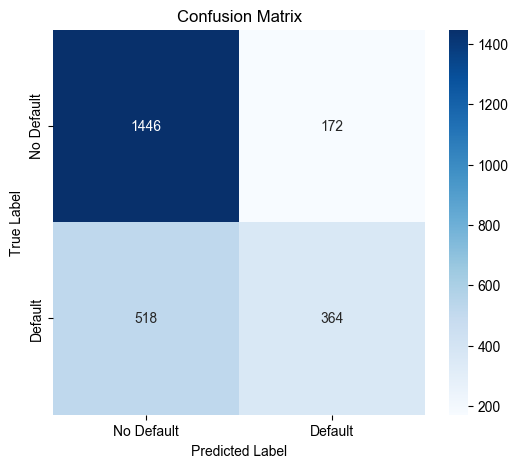

In [81]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


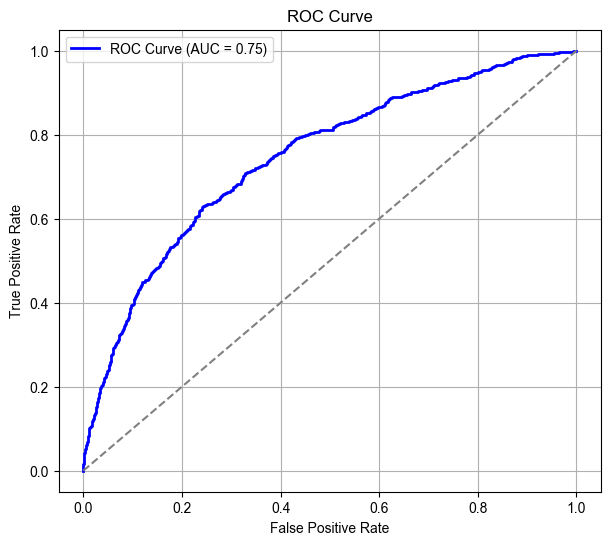

In [82]:
# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, y_proba)

# ROC Curve 시각화
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


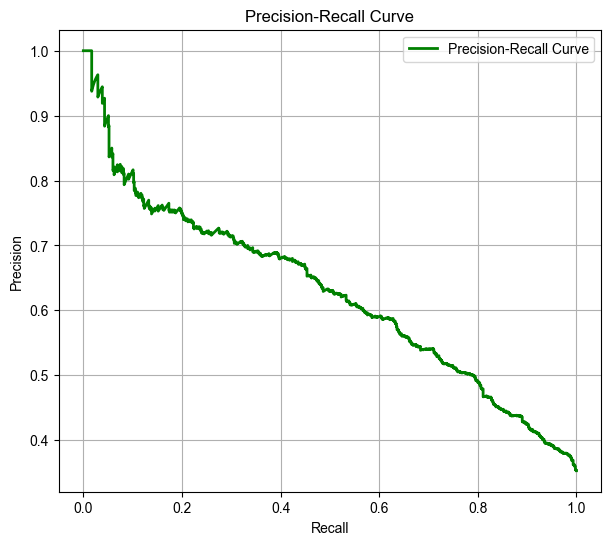

In [83]:
# PR Curve 계산
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)

# PR Curve 시각화
plt.figure(figsize=(7, 6))
plt.plot(recall_vals, precision_vals, color='green', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [84]:
import matplotlib.font_manager as fm
import matplotlib

# 윈도우
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname = font_path).get_name()
# matplotlib.rc('font', family=font)

# 맥
font_path = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

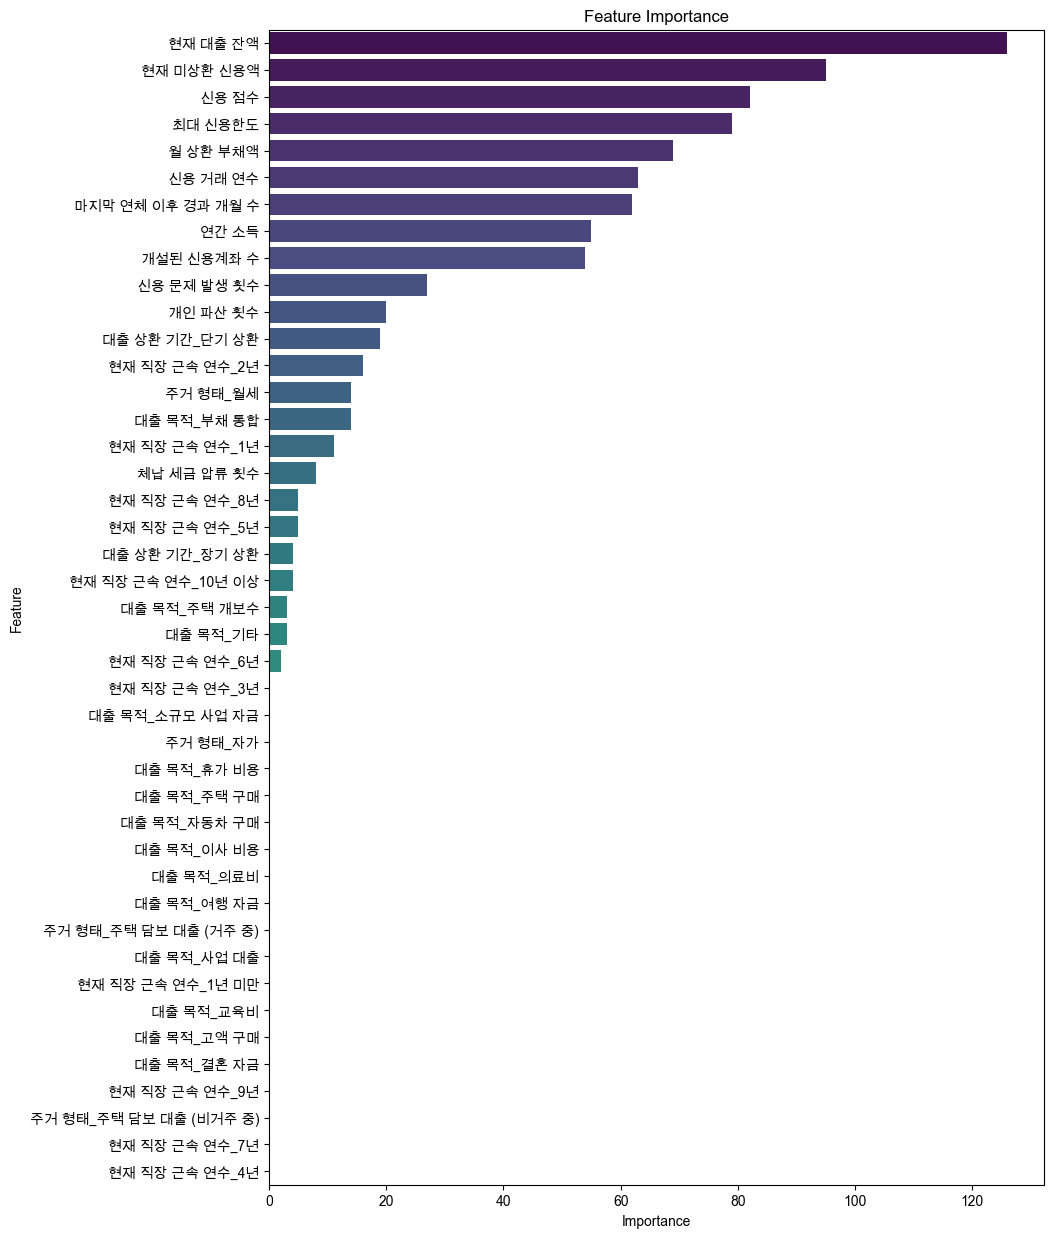

In [85]:
# Feature Importance 가져오기
feature_importance = best_lightgbm.feature_importances_
feature_names = X_train.columns

# Feature Importance 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 15))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.show()


In [116]:
# LightGBM 모델 학습 (학습 과정 저장)
best_lightgbm = lgb.LGBMClassifier(
    n_estimators= 572,
    learning_rate= 0.26845447236329595,
    max_depth= 4,
    num_leaves= 214,
    min_child_samples= 46,
    subsample= 0.7946444603985497,
    colsample_bytree= 0.9772765032896094,
    reg_alpha= 7.387475036790657, 
    reg_lambda= 7.7699707203706865,
    min_split_gain= 0.24786221473468117,
    feature_fraction= 0.730653668928907,
    random_state=42)

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_names = ['train', 'valid']  # ✅ 명시적으로 학습 데이터 명 설정

from lightgbm import early_stopping

# LightGBM 모델 학습 (early_stopping을 callbacks로 설정)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
best_lightgbm.fit(X_tr, y_tr, eval_set=eval_set, callbacks=[early_stopping(10)],)


# 학습 과정 결과 저장
results = best_lightgbm.evals_result_

# ✅ KeyError 방지: 저장된 evals_result 확인
print(results.keys())  # ['train', 'valid'] 이렇게 나와야 함


[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Info] Number of positive: 1894, number of negative: 3731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 35
[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Warning] Found whitespace in feature_names, replac

In [119]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
import seaborn as sns

# 예측


y_pred = best_lightgbm.predict(X_test)
y_proba = best_lightgbm.predict_proba(X_test)[:, 1]  # ROC Curve 및 PR Curve를 위한 확률값

# 성능 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 결과 출력
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ AUC-ROC: {roc_auc:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
[LightGBM] [Warning] feature_fraction is set=0.730653668928907, colsample_bytree=0.9772765032896094 will be ignored. Current value: feature_fraction=0.730653668928907
✅ Accuracy: 0.7148
✅ Precision: 0.6610
✅ Recall: 0.3934
✅ F1-Score: 0.4932
✅ AUC-ROC: 0.7417


In [117]:
results.keys()

dict_keys(['training', 'valid_1'])

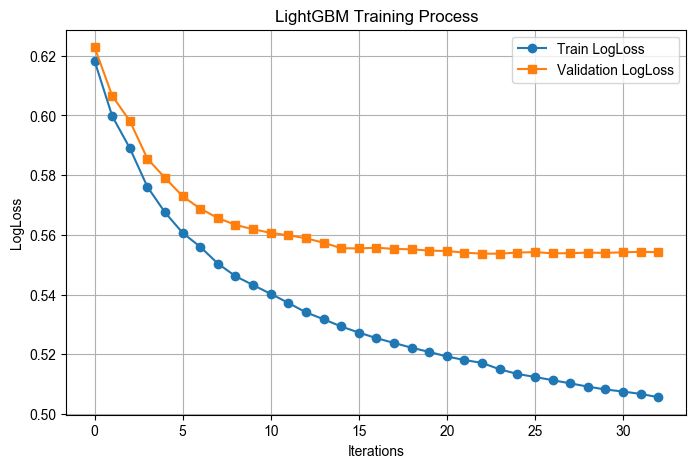

In [118]:
# # 학습 과정에서 저장된 평가 점수 가져오기
# results = best_lightgbm.evals_result_
# results
# 학습 과정 시각화
plt.figure(figsize=(8, 5))
plt.plot(results['training']['binary_logloss'], label='Train LogLoss', marker='o')
plt.plot(results['valid_1']['binary_logloss'], label='Validation LogLoss', marker='s')
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.title('LightGBM Training Process')
plt.legend()
plt.grid()
plt.show()
